# Logistic Regression

## Logistic regression is a <span style = "color:red">supervised learning algorithm </span> specifically designed for <span style = "color:red"> binary classification tasks </span> ,  where it learns to predict one of two possible classes based on input features and labeled training data. 

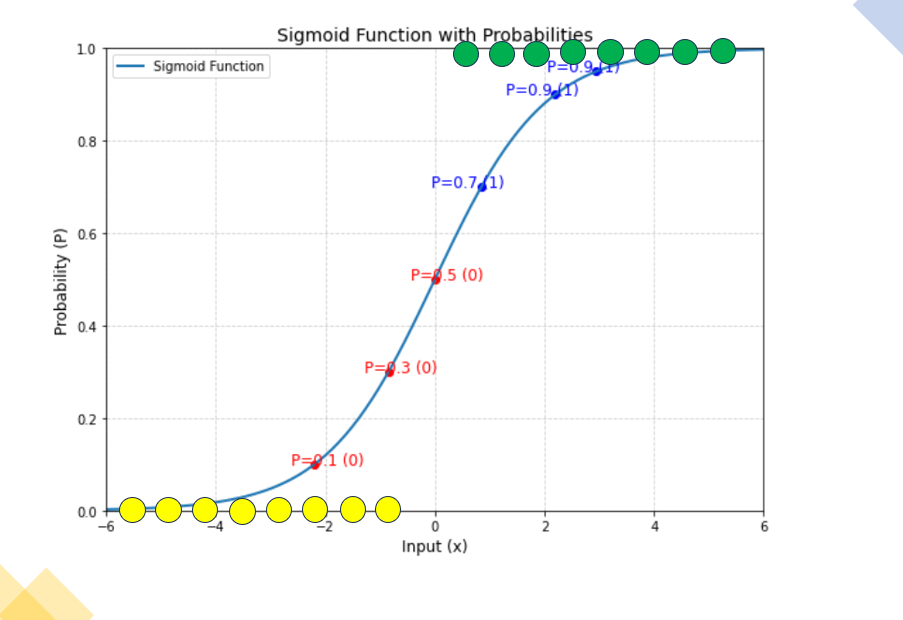

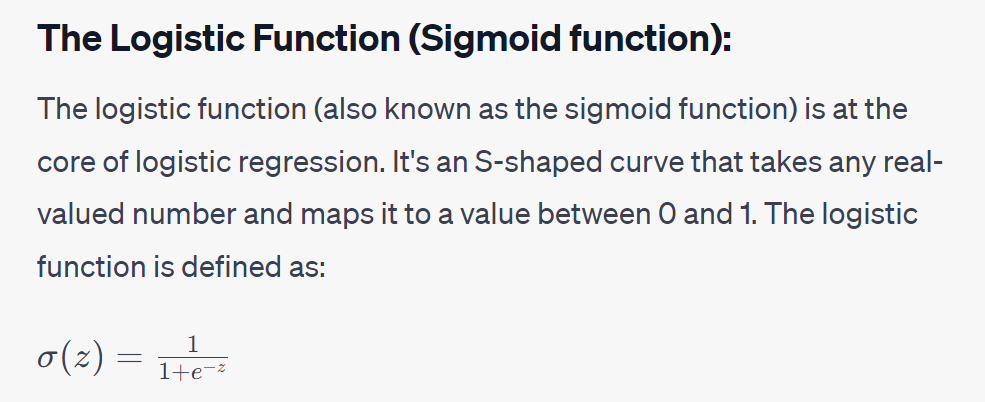

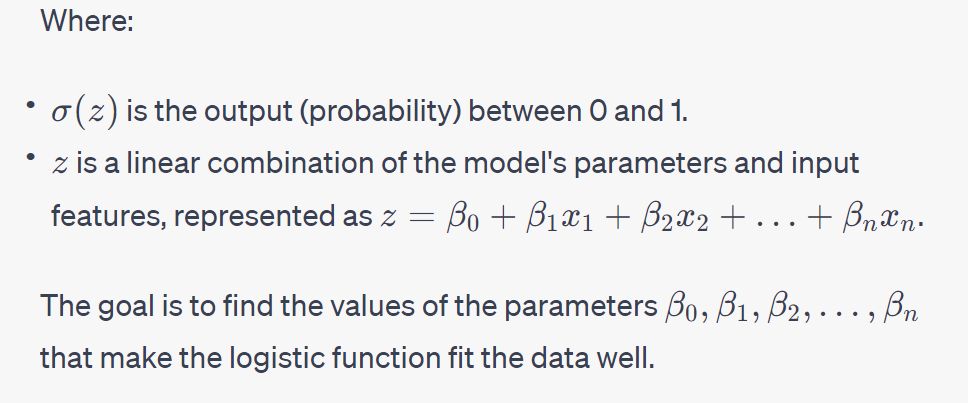

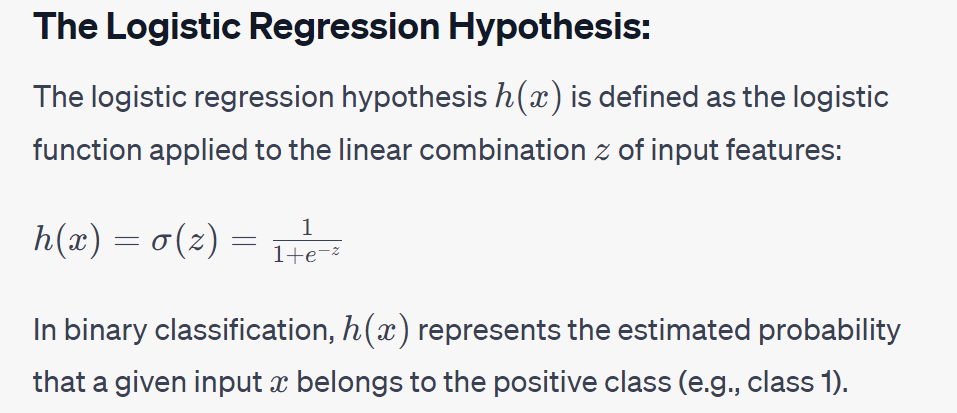

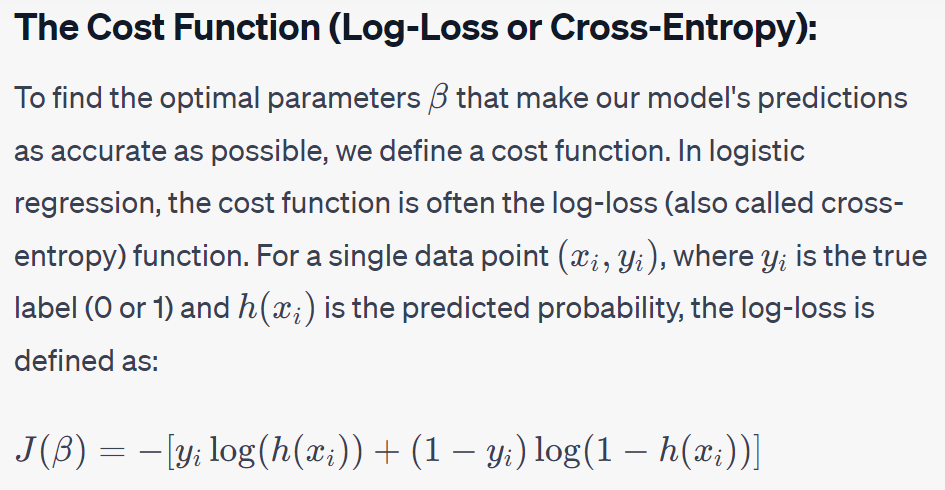

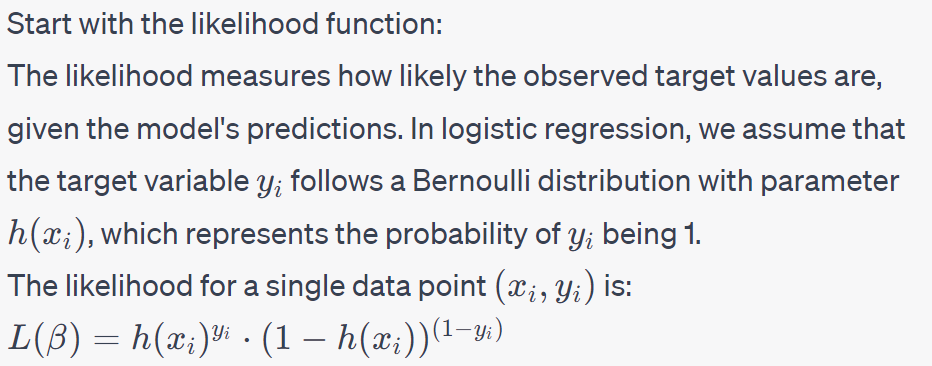

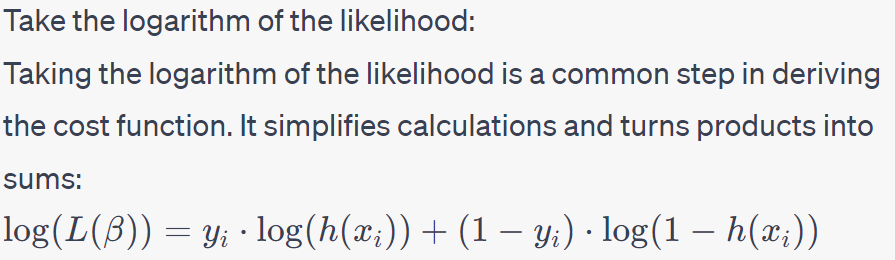

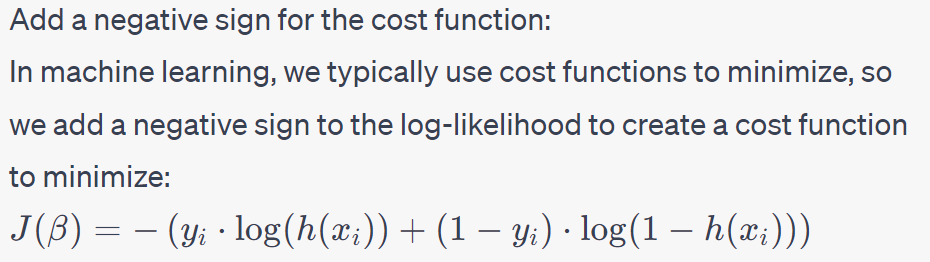

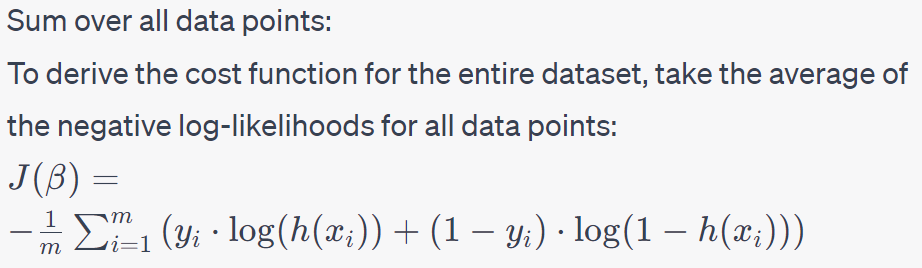

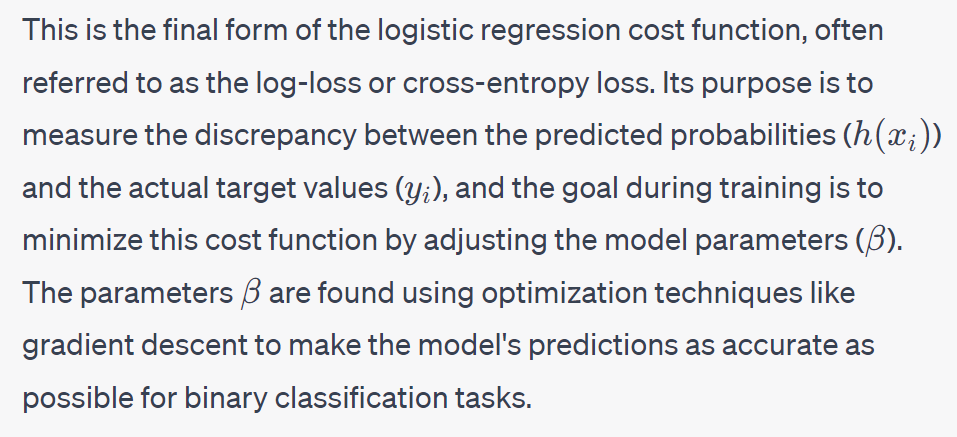

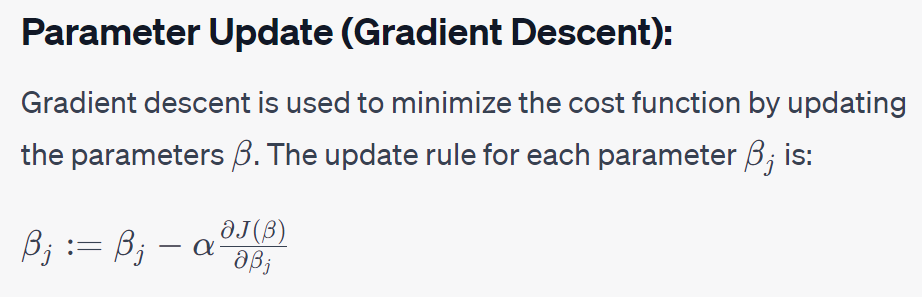

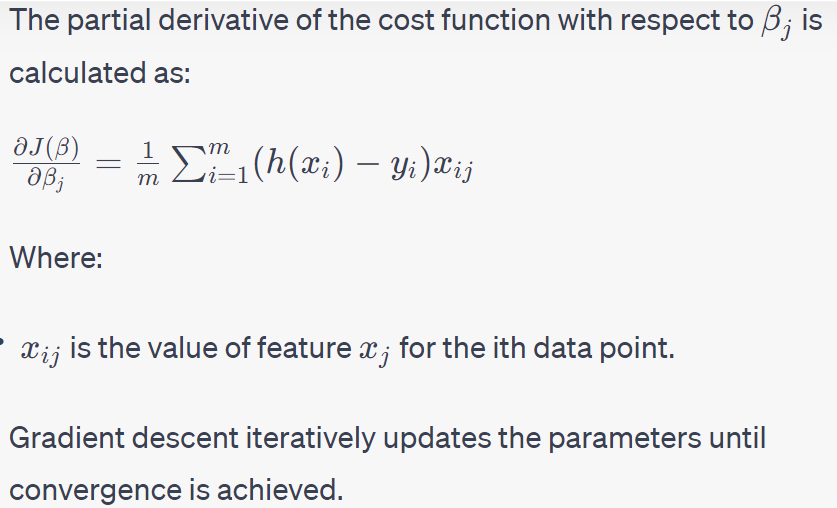

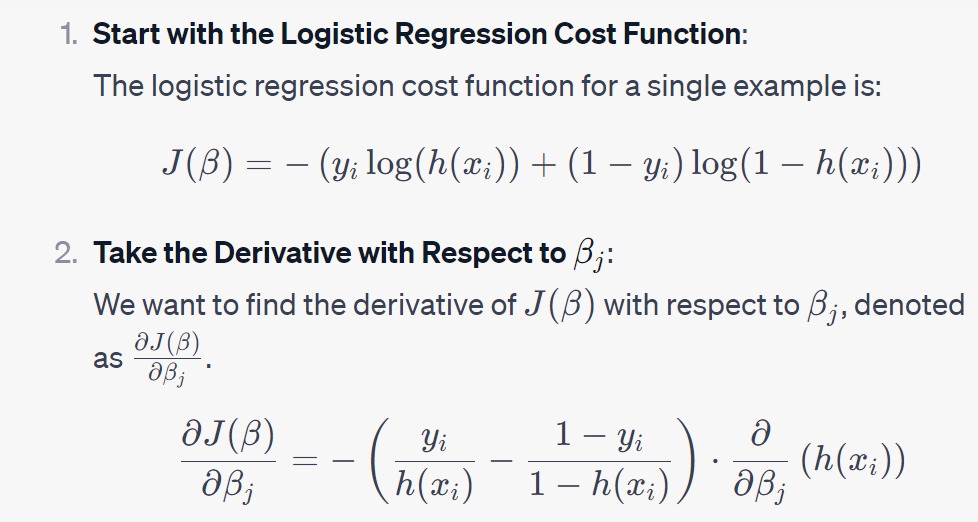

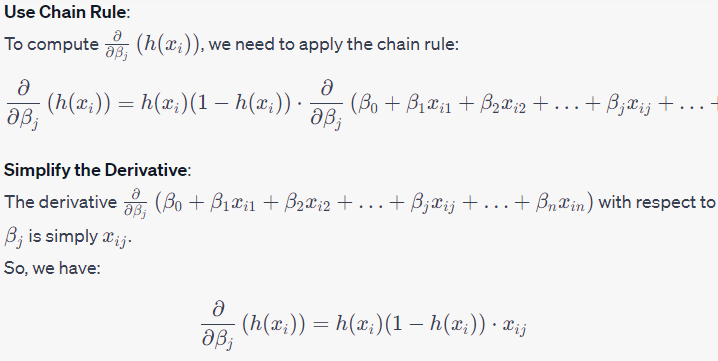

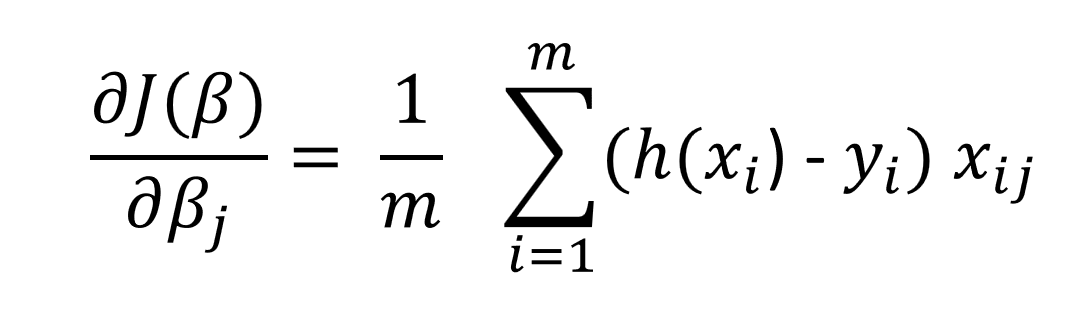

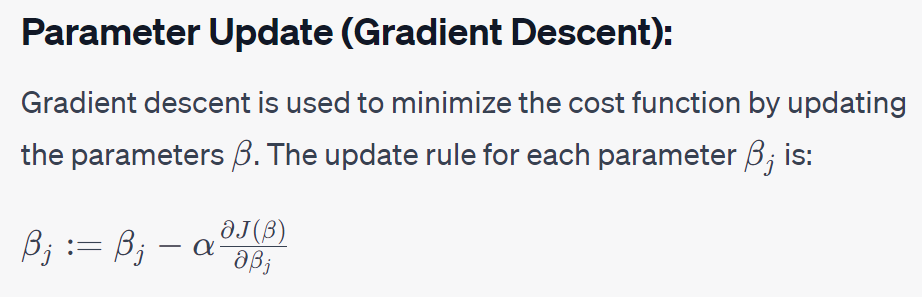

# What is a confusion matrix ?

## <span style = "color:red"> A confusion matrix is a table that is often used to evaluate the performance of a classification algorithm. It shows the number of true positives, true negatives, false positives, and false negatives for a binary classification problem. </span>

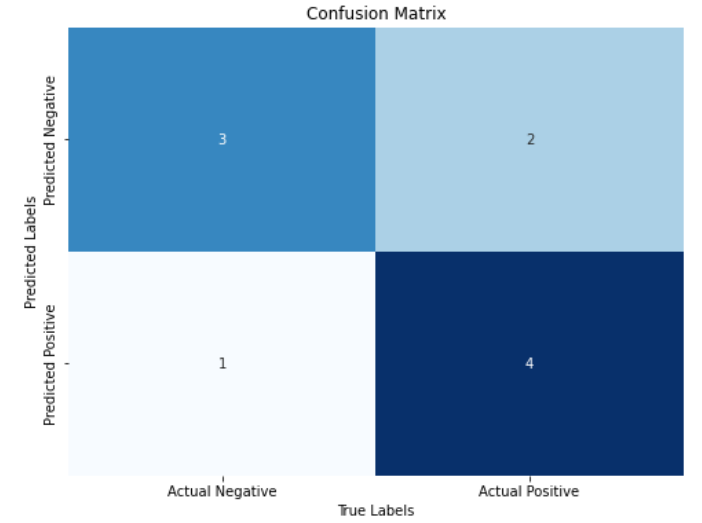

# Accuracy Score = (3 + 4 ) / (1 + 2 + 3 + 4)

In [6]:
import pandas as pd 

df = pd.read_csv("spam_email_dataset.csv")
df.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [9]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the LogisticRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LogisticRegression

# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Import the StandardScaler class from scikit-learn's preprocessing module
from sklearn.preprocessing import StandardScaler

# Import the confusion_matrix and accuracy_score functions from scikit-learn's metrics module
from sklearn.metrics import confusion_matrix, accuracy_score

# Load and preprocess the spam email dataset
data_original = pd.read_csv("spam_email_dataset.csv")
# Select specific columns of interest from the original dataset
data_selected = data_original[["Attachments", "Link Count", "Word Count", "Uppercase Count", "Exclamation Count", "Question Count", "Dollar Count", "Punctuation Count", "HTML Tags Count", "Spam Indicator"]]

# Display summary statistics of the selected data
summary_statistics = data_selected.describe()
print("Summary Statistics:")
print(summary_statistics)

# Calculate and display the correlation matrix of the selected data
correlation_matrix = data_selected.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Extract features and target from the selected data
features = data_selected[["Attachments", "Link Count", "Uppercase Count", "Exclamation Count", "Question Count", "Dollar Count", "Punctuation Count", "HTML Tags Count"]]
target = data_selected["Spam Indicator"]

# Split data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# scaler is an instance of the StandardScaler class from a library like Scikit-Learn. 
# It's used to scale (standardize) the features so that they have a mean of 0 and a standard deviation of 1. 
# This is a common preprocessing step in machine learning to ensure that all features have the same scale.
# features_train_scaled is the training data after scaling. 
# The fit_transform method is used to both compute the mean and standard deviation of the training data 
# and scale it accordingly.
# features_test_scaled is the testing data after scaling. 
# Here, the transform method is used to scale the testing data using the mean and standard 
# deviation computed from the training data.

# Create a Logistic Regression model
model = LogisticRegression(max_iter=200000, C=0.10)

# A logistic regression model is created using the LogisticRegression class from Scikit-Learn.
# max_iter is set to a high value (200,000) to ensure that the optimization algorithm has 
# enough iterations to converge to a solution. It controls the maximum number of 
# iterations for the solver to converge.
# C is the regularization parameter, which controls the strength of regularization. 
# A higher value of C means weaker regularization. It's set to 10.0 in this case.

# The parameter C in logistic regression (and other machine learning models) is known as the regularization parameter. 
# It plays a crucial role in controlling the balance between fitting the training data well and preventing overfitting. 
# Let's break down what it means in more detail:

# Regularization:

# Regularization is a technique used in machine learning to prevent models from becoming too complex, 
# which can lead to overfitting. Overfitting occurs when a model fits the training data extremely well 
# but does not generalize well to unseen data.
# Regularization introduces a penalty term into the model's optimization function. 
# This penalty discourages the model from assigning too much importance to any one feature or from 
# fitting the training data too closely.

# The Role of C:

# In logistic regression, the C parameter controls the inverse of the regularization strength. Specifically:
# Smaller values of C lead to stronger regularization. This means that the model is penalized more for 
# complex decision boundaries and is encouraged to simplify the decision boundary, which can result in 
# underfitting (the model is too simple).
# Larger values of C lead to weaker regularization. The model is penalized less for complex decision boundaries, 
# allowing it to fit the training data more closely. This can lead to overfitting if the data is noisy 
# or if the model is too complex relative to the amount of training data.
# So, when C is set to a higher value like 10.0, it means that you are prioritizing fitting 
# the training data closely (weaker regularization). This can be appropriate if you have a large amount of 
# high-quality training data and you want the model to capture complex patterns in the data.
# Choosing the Right C Value:

# The choice of the C parameter depends on your specific dataset and the trade-off you want to make between
# fitting the training data and preventing overfitting.
# It's common practice to use techniques like cross-validation to find the optimal C value. 
# By trying different values of C and evaluating the model's performance on a validation set, 
# you can select the C that results in the best trade-off between bias and variance (underfitting and overfitting).

# Fit the model to the scaled training data
model.fit(features_train_scaled, target_train)

# This line trains the logistic regression model on the scaled training data (features_train_scaled) 
# and their corresponding labels (target_train). The model learns to make predictions based on this training data.

# Make predictions on the scaled testing data
predictions = model.predict(features_test_scaled)

# This line uses the trained logistic regression model to make predictions on the 
# scaled testing data (features_test_scaled). It assigns a predicted class label to each data point in the test set.

# Display confusion matrix to assess model performance
print("\nConfusion Matrix:")
print(confusion_matrix(target_test, predictions))

# The confusion matrix is a table that shows the number of 
# true positive, true negative, false positive, and false negative predictions made by the model. 
# It is a useful tool for evaluating the performance of a classification model.

# Calculate accuracy score to evaluate model accuracy
accuracy = accuracy_score(target_test, predictions)
print(f"Accuracy Score: {accuracy:.4f}")

# The accuracy score is calculated using the accuracy_score function from Scikit-Learn. 
# It measures the proportion of correctly classified samples in the test data. 
# The result is printed with four decimal places.

Summary Statistics:
       Attachments   Link Count   Word Count  Uppercase Count  \
count  6000.000000  6000.000000  6000.000000      6000.000000   
mean      1.497833     5.005500   153.269500        75.997667   
std       1.125555     3.166092    83.135747        64.735568   
min       0.000000     0.000000    10.000000         0.000000   
25%       0.000000     2.000000    83.000000        23.000000   
50%       1.000000     5.000000   154.000000        59.000000   
75%       3.000000     8.000000   223.000000       114.000000   
max       3.000000    10.000000   300.000000       300.000000   

       Exclamation Count  Question Count  Dollar Count  Punctuation Count  \
count        6000.000000     6000.000000   6000.000000        6000.000000   
mean            2.481833        1.486000      0.989500           7.549667   
std             1.717895        1.118785      0.812301           4.624619   
min             0.000000        0.000000      0.000000           0.000000   
25%      

In [10]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

creditData = pd.read_csv("credit_data.csv")
creditData.head()


,clientid,income,age,loan,default
0,1,66155.92510,59.017015,8106.532131,0
1,2,34415.15397,48.117153,6564.745018,0
2,3,57317.17006,63.108049,8020.953296,0
3,4,42709.53420,45.751972,6103.642260,0
4,5,66952.68885,18.584336,8770.099235,1


In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load credit data
data = pd.read_csv("credit_data.csv")
data = data.dropna()

# Display a preview of the credit data
print("Preview of Credit Data:")
print(data.head())

# Display summary statistics of the credit data
print("\nSummary Statistics:")
print(data.describe())

# Display correlation matrix of the credit data
print("\nCorrelation Matrix:")
print(data.corr())

# Extract features and target from the credit data
features = data[["income", "age", "loan"]]
target = data.default

# Split data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)

# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(target_test, predictions))
# Display accuracy score
accuracy = accuracy_score(target_test, predictions)
print(f"Accuracy Score: {accuracy:.4f}")


Preview of Credit Data:
   clientid       income        age         loan  default
0         1  66155.92510  59.017015  8106.532131        0
1         2  34415.15397  48.117153  6564.745018        0
2         3  57317.17006  63.108049  8020.953296        0
3         4  42709.53420  45.751972  6103.642260        0
4         5  66952.68885  18.584336  8770.099235        1

Summary Statistics:
          clientid        income          age          loan      default
count  1997.000000   1997.000000  1997.000000   1997.000000  1997.000000
mean   1001.956935  45333.864334    40.807559   4445.487716     0.141713
std     576.702206  14325.131177    13.624469   3046.792457     0.348842
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     503.000000  32804.904490    28.990415   1936.813257     0.000000
50%    1002.000000  45788.747100    41.317159   3977.287432     0.000000
75%    1501.000000  57787.565660    52.587040   6440.861434     0.000000
max    2000.000000  699

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-6, 6, 100)  # Create 100 points from -6 to 6

# Calculate corresponding probabilities using the sigmoid function
y = sigmoid(x)

# Create some example probabilities for both 0 and 1
example_probs_0 = [0.1, 0.3, 0.5]
example_probs_1 = [0.7, 0.9, 0.95]

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Sigmoid Function', linewidth=2)

# Plot example probabilities on the curve
for p in example_probs_0:
    x_p = -np.log(1/p - 1)  # Convert probability to x-coordinate
    plt.scatter(x_p, p, color='red', marker='o')
    plt.annotate(f'P={p:.1f} (0)', (x_p, p), textcoords='offset points', xytext=(10,0), ha='center', fontsize=12, color='red')

for p in example_probs_1:
    x_p = -np.log(1/p - 1)  # Convert probability to x-coordinate
    plt.scatter(x_p, p, color='blue', marker='o')
    plt.annotate(f'P={p:.1f} (1)', (x_p, p), textcoords='offset points', xytext=(-10,0), ha='center', fontsize=12, color='blue')

# Customize the plot
plt.title('Sigmoid Function with Probabilities', fontsize=14)
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Probability (P)', fontsize=12)
plt.xlim(-6, 6)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example ground truth and predicted labels
y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Actual Negative', 'Actual Positive'],
            yticklabels=['Predicted Negative', 'Predicted Positive'])
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()